In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Data Extraction

In [91]:
vacancies = pd.read_csv("../vacancies.csv")
vacancies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             223 non-null    object 
 1   company           223 non-null    object 
 2   salary            87 non-null     object 
 3   english_level     204 non-null    object 
 4   experience_year   223 non-null    int64  
 5   domen             141 non-null    object 
 6   work_type         223 non-null    object 
 7   company_type      223 non-null    object 
 8   test_available    37 non-null     float64
 9   views             223 non-null    int64  
 10  applications      223 non-null    int64  
 11  publication_date  223 non-null    object 
 12  technologies      222 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 22.8+ KB


# Analytics of demand for levels of English

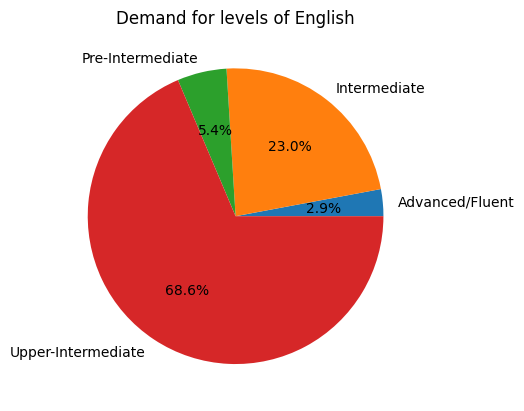

In [92]:
english_level = vacancies.groupby("english_level")["title"].count()

plt.pie(
    english_level.values,
    labels=english_level.index,
    autopct="%1.1f%%",
)
plt.title("Demand for levels of English")
plt.show()

# Analytics of demand for experience years

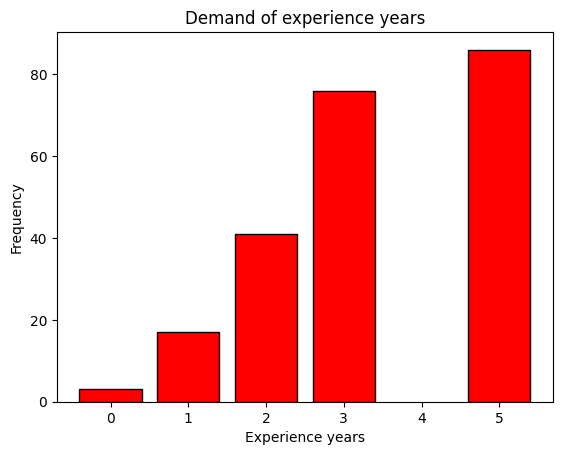

In [93]:
experience = vacancies.groupby("experience_year")["title"].count()

plt.bar(
    experience.index,
    experience.values,
    color="red",
    edgecolor="black",
)
plt.title("Demand of experience years")
plt.xlabel("Experience years")
plt.ylabel("Frequency")
plt.xticks(range(len(experience.index) + 1))
plt.show()

# Prepare for Technology Analytics

In [109]:
def plot_top_technologies(data: pd.DataFrame, title: str):
    plt.figure(figsize=(10, 6))
    data.plot(kind="bar", color="green")
    plt.title(title)
    plt.xlabel("Technologies")
    plt.ylabel("Frequency")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

def get_top_technologies_by_experience(df: pd.DataFrame, min_exp_years: int, max_exp_years: int, title: str):
    technologies_exp = (
        df[(df["experience_year"] >= min_exp_years) & (df["experience_year"] < max_exp_years )]["technologies"]
        .str.split(",")
        .explode()
        .value_counts()
    )
    top_technologies_exp = technologies_exp.head(30)
    plot_top_technologies(top_technologies_exp, title)

# Analytics for most mentioned technologies

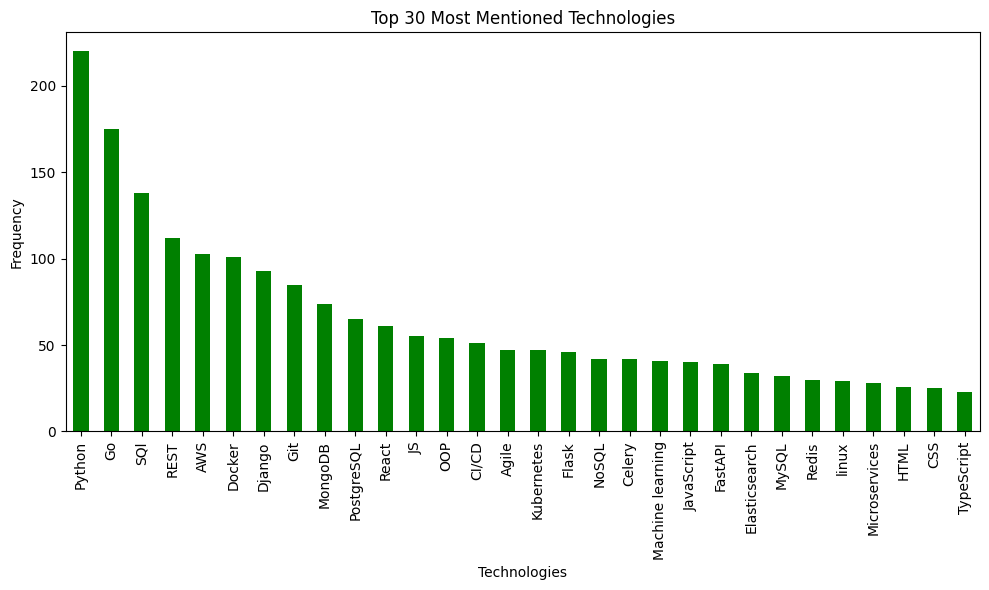

In [105]:
all_technologies = (
    vacancies["technologies"]
    .str.split(",")
    .explode()
    .value_counts()
)

top_technologies = all_technologies.head(30)

plot_top_technologies(top_technologies, "Top 30 Most Mentioned Technologies")

# Analytics for most mentioned technologies for junior

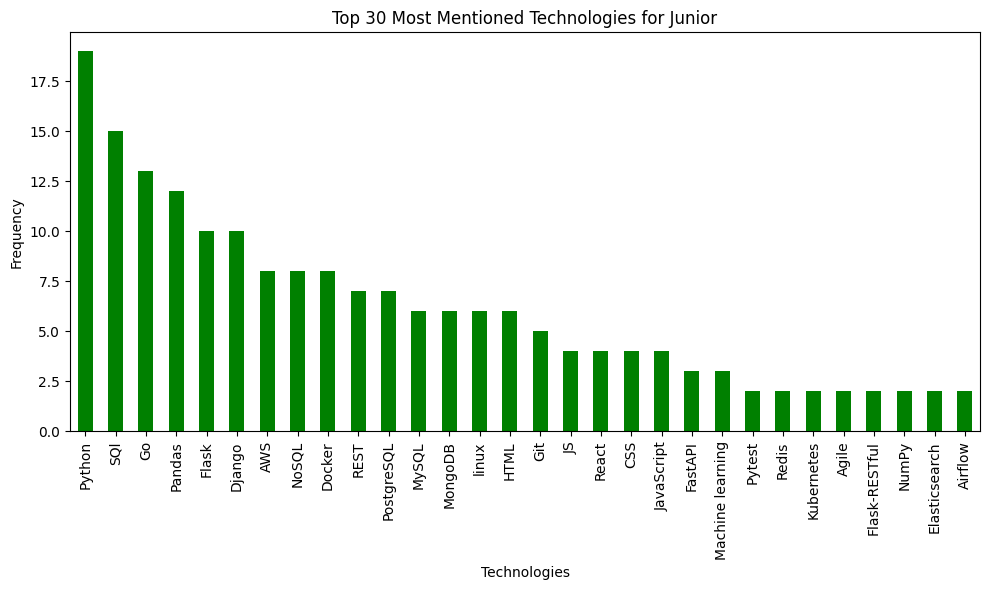

In [110]:
get_top_technologies_by_experience(vacancies,0, 3, "Top 30 Most Mentioned Technologies for Junior")

# Analytics for most mentioned technologies for middle developer

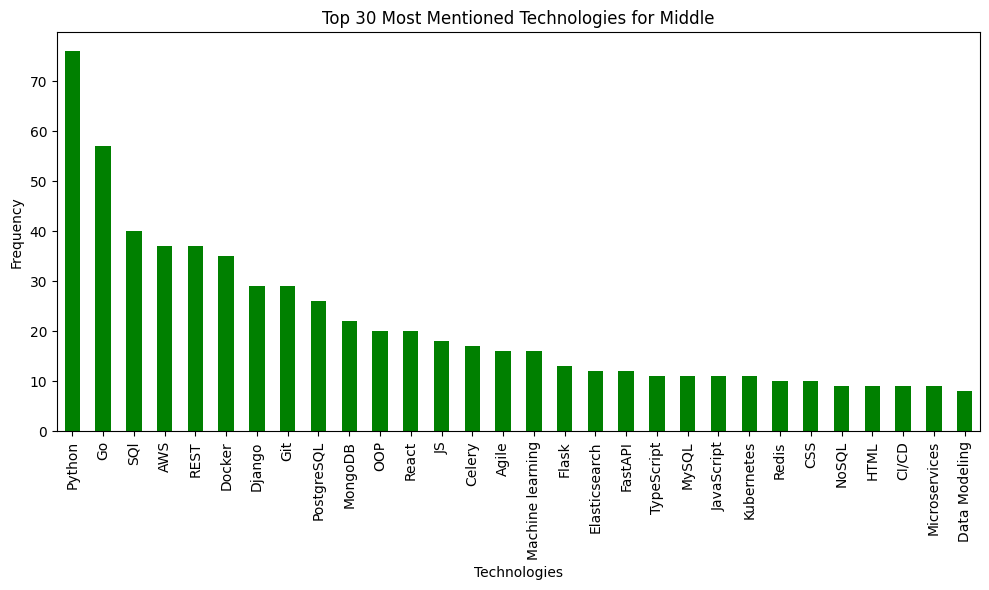

In [111]:
get_top_technologies_by_experience(vacancies, 3, 5, "Top 30 Most Mentioned Technologies for Middle")

# Analytics for most mentioned technologies for Senior

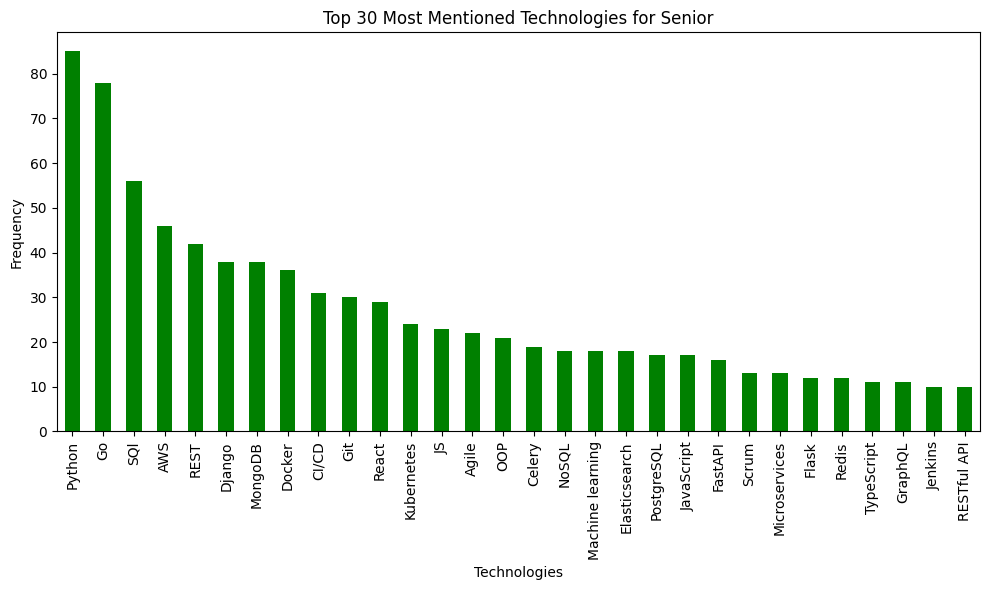

In [112]:
get_top_technologies_by_experience(vacancies, 5, float("inf"), "Top 30 Most Mentioned Technologies for Senior")

# Data wrangling for salary

In [98]:

vacancies[["min_salary", "max_salary"]] = vacancies["salary"].str.extract(r"\$(\d+)-(\d+)")

vacancies[["min_salary", "max_salary"]] = vacancies[["min_salary", "max_salary"]].astype(float)

vacancies["avg_salary"] = vacancies[["min_salary", "max_salary"]].mean(axis=1)

vacancies[["salary","min_salary", "max_salary", "avg_salary"]]

,salary,min_salary,max_salary,avg_salary
0,NaN,NaN,NaN,NaN
1,$4000-5000,4000.0,5000.0,4500.0
2,$2000-3500,2000.0,3500.0,2750.0
3,$3000-5000,3000.0,5000.0,4000.0
4,NaN,NaN,NaN,NaN
...,...,...,...,...
218,NaN,NaN,NaN,NaN
219,$4000-7000,4000.0,7000.0,5500.0
220,NaN,NaN,NaN,NaN
221,NaN,NaN,NaN,NaN


# Visualization of the dependence of salary on work experience

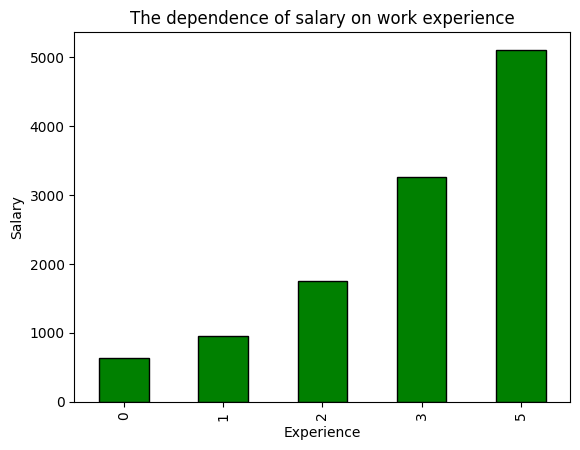

In [99]:
experience_salary = vacancies.groupby("experience_year")["avg_salary"].mean()

experience_salary.plot.bar(
    xlabel="Experience",
    ylabel="Salary",
    color="green", 
    edgecolor="black", 
    title="The dependence of salary on work experience"
)
plt.show()

# Visualization of the dependence of applications on the average salary

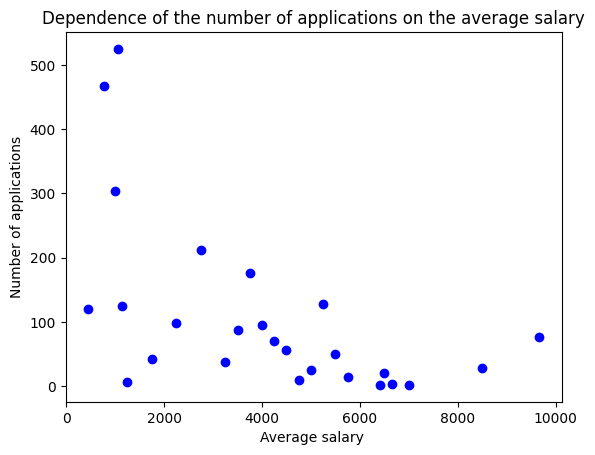

In [100]:
applications_salary = vacancies.groupby("avg_salary")["applications"].sum()

plt.scatter(applications_salary.index, applications_salary.values, color="blue")
plt.title("Dependence of the number of applications on the average salary")
plt.xlabel("Average salary ")
plt.ylabel("Number of applications")
plt.show()

# Visualization of the dependence of views on the company

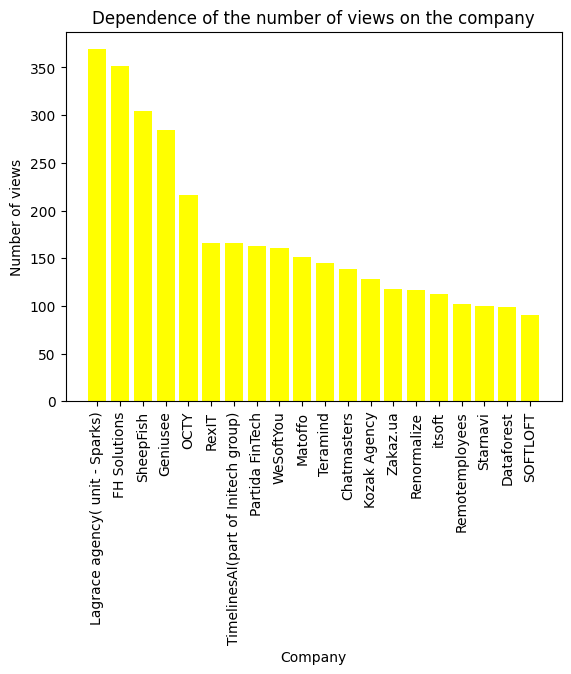

In [101]:
company_views = vacancies.groupby("company")["views"].sum()
company_views = company_views.sort_values(ascending=False)[:20]

plt.bar(company_views.index, company_views.values, color="yellow")
plt.title("Dependence of the number of views on the company")
plt.xlabel("Company")
plt.ylabel("Number of views")
plt.xticks(rotation=90)
plt.show()

In [102]:
vacancies

,title,company,salary,english_level,experience_year,domen,work_type,company_type,test_available,views,applications,publication_date,technologies,min_salary,max_salary,avg_salary
0,Odoo Developer (Middle/Senior),Evo Mall,NaN,Intermediate,2,E-commerce / Marketplace,Office або Remote,Product,NaN,0,0,2023-11-20,"Python,Docker,HTML,CSS,Git,SQl,PostgreSQL,CI/C...",NaN,NaN,NaN
1,Senior Python Developer,Unikoom,$4000-5000,Upper-Intermediate,5,Travel / Tourism,Тільки віддалено,Product,NaN,6,6,2023-11-20,"Python,Django,Flask,FastAPI,Docker,AWS,Elastic...",4000.0,5000.0,4500.0
2,Senior Python Developer,The Frontend Company,$2000-3500,Upper-Intermediate,3,NaN,Тільки віддалено,Outstaff,NaN,5,5,2023-11-18,"Python,AWS,GraphQL,React,Go,JS",2000.0,3500.0,2750.0
3,Senior Python Developer,AutoDS,$3000-5000,Intermediate,3,E-commerce / Marketplace,Тільки віддалено,Product,1.0,39,39,2023-11-19,"Python,Flask,FastAPI,SQLAlchemy,MongoDB,Celery...",3000.0,5000.0,4000.0
4,Senior Python Backend Engineer,Develux,NaN,Intermediate,5,Education,Office або Remote,Product,NaN,8,8,2023-11-18,"Python,Django,MongoDB,Docker,Kubernetes,AWS,Re...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Python Engineer,Intobi,NaN,Upper-Intermediate,5,E-commerce / Marketplace,Office або Remote,Outsource,NaN,6,6,2023-10-23,"Python,Django,React,Go",NaN,NaN,NaN
219,Senior Python Developer,ATC,$4000-7000,Upper-Intermediate,5,SaaS,Тільки віддалено,Product,NaN,20,20,2023-10-23,"Python,FastAPI,AWS",4000.0,7000.0,5500.0
220,Senior QA Python Automation Engineer,Luxoft,NaN,Advanced/Fluent,5,NaN,Тільки офіс,Outsource,NaN,3,3,2023-10-23,"Python,Pytest,Git,Go,linux,OOP",NaN,NaN,NaN
221,Senior Artificial Intelligence Consultant,Fluvius,NaN,Upper-Intermediate,5,NaN,Тільки віддалено,Outstaff,NaN,4,4,2023-10-23,"Python,TensorFlow,PyTorch,Agile,Go,Machine lea...",NaN,NaN,NaN
